In [8]:
import numpy as np
import pandas as pd
import os
import re
import csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pyfftw

## Data prep ##

In [ ]:
#####extracting velocity(ux, uy)#####

base_path = "../2D_Decay"

all_folders = os.listdir(base_path)

numeric_folders = sorted(
    [folder for folder in all_folders if folder.replace('.', '').isdigit()],
    key=lambda x: float(x)
)

output_dir = "../processed_data"
os.makedirs(output_dir, exist_ok=True)

for folder in numeric_folders:
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        u_file_path = os.path.join(folder_path, "U")
        if os.path.isfile(u_file_path):
            print(f"Processing file: {u_file_path}")
            with open(u_file_path, 'r') as file:
                lines = file.readlines()
                data = []
                in_data_section = False

                for line in lines:
                    line = line.strip()
                    if line.startswith("internalField"):
                        in_data_section = True
                        continue
                    if in_data_section:
                        if line.startswith(")"):
                            break
                        # 정규식으로 ux, uy 값 추출
                        match = re.match(r"\(([-\d.eE+]+) ([-\d.eE+]+) [-\d.eE+]+\)", line)
                        if match:
                            ux = float(match.group(1))
                            uy = float(match.group(2))
                            data.append((ux, uy))

                if data:
                    csv_file = os.path.join(output_dir, f"{folder}_ux_uy_data.txt")
                    with open(csv_file, "w", newline="") as csvfile:
                        writer = csv.writer(csvfile)
                        writer.writerow(["ux", "uy"])
                        writer.writerows(data)
                    print(f"Saved {len(data)} entries for folder {folder} to {csv_file}")
                else:
                    print(f"No vector data found in {u_file_path}.")

def load_csv_data(folder_name):
    csv_file = os.path.join(output_dir, f"{folder_name}_ux_uy_data.txt")
    if os.path.isfile(csv_file):
        try:
            data = np.loadtxt(csv_file, delimiter=",", skiprows=1)
            if data.ndim == 1:  # 1차원 배열 처리
                data = data.reshape(-1, 2)
            return data
        except ValueError:
            print(f"No valid data in file: {csv_file}")
            return None
    else:
        print(f"No data file found for folder: {folder_name}")
        return None

folder_to_process = "0.2"
data = load_csv_data(folder_to_process)
if data is not None and len(data) > 0:
    print(f"Loaded {len(data)} entries from folder {folder_to_process}")
    avg_ux = np.mean(data[:, 0])
    avg_uy = np.mean(data[:, 1])
    print(f"Average ux: {avg_ux:.6f}, uy: {avg_uy:.6f}")
else:
    print(f"No data available for folder {folder_to_process}.")


In [ ]:
#####extracting vorticity######

base_path = "../2D_Decay"
all_folders = os.listdir(base_path)

numeric_folders = sorted(
    [folder for folder in all_folders if folder.replace('.', '').isdigit()],
    key=lambda x: float(x)
)

output_dir = "../proceed_data_vor/proceed_data_v_given/processed_data_vor"
os.makedirs(output_dir, exist_ok=True)

for folder in numeric_folders:
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        u_file_path = os.path.join(folder_path, "vorticity")
        if os.path.isfile(u_file_path):
            with open(u_file_path, 'r') as file:
                lines = file.readlines()
                vorticity_data = []
                in_data_section = False

                for line in lines:
                    line = line.strip()
                    if line.startswith("internalField"):
                        in_data_section = True
                        continue
                    if in_data_section:
                        if line.startswith(")"):
                            break
                        match = re.match(r"\([\d\-eE.+]+ [\d\-eE.+]+ ([\d\-eE.+]+)\)", line)
                        if match:
                            vorticity = float(match.group(1))  # 3번째 열 추출(z축만 추출)
                            vorticity_data.append(vorticity)

                csv_file = os.path.join(output_dir, f"{folder}_vor_data.txt")
                with open(csv_file, "w", newline="") as csvfile:
                    writer = csv.writer(csvfile)
                    writer.writerow(["vorticity"])
                    writer.writerows([[value] for value in vorticity_data])
                print(f"Saved {len(vorticity_data)} entries for folder {folder} to {csv_file}")

def load_csv_data(folder_name):
    csv_file = os.path.join(output_dir, f"{folder_name}_vor_data.txt")
    if os.path.isfile(csv_file):
        data = np.loadtxt(csv_file, delimiter=",", skiprows=1)
        return data
    else:
        print(f"No data file found for folder: {folder_name}")
        return None

folder_to_process = "0.2"
vor_data = load_csv_data(folder_to_process)
if vor_data is not None:
    print(f"Loaded {len(vor_data)} entries from folder {folder_to_process}")
    print(f"Average vorticity: {np.mean(vor_data):.6f}")


## declare file path ##

In [3]:
files = [
    '../proceed_data/proceed_data_v_given/processed_data_u/0_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/50_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/70_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/90_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/110_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/130_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/150_ux_uy_data.txt',
    
]
files2 = [
    '../proceed_data/proceed_data_v_10/processed_data_u/0_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/50_ux_uy_data.txt',
]


files_vor = [
    '../proceed_data/proceed_data_v_given/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/50_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/70_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/90_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/110_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/130_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/150_vor_data.txt',
    
]

files2_vor = [
    '../proceed_data/proceed_data_v_10/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/50_vor_data.txt',
]


## Energy Spectrum Function ##

In [17]:
# def compute_spectrum(u_data):
#     grid_size = 1024
#     ux = u_data.reshape((grid_size, grid_size))
    
#     ux_fft = np.fft.fft2(ux)
#     energy_density = 0.5 * (np.abs(ux_fft)**2)
    
#     kx = np.fft.fftfreq(grid_size) * grid_size
#     ky = np.fft.fftfreq(grid_size) * grid_size
#     k = np.sqrt(kx[:, None]**2 + ky[None, :]**2)
    
#     k_bins = np.arange(0, k.max(), 1)
#     k_spectrum = np.zeros(len(k_bins) - 1)
    
#     for i in range(len(k_bins) - 1):
#         mask = (k >= k_bins[i]) & (k < k_bins[i+1])
#         if np.any(mask):
#             k_spectrum[i] = energy_density[mask].mean()
    
#     return k_bins[:-1], k_spectrum

def compute_spectrum(u_data):
    """
    2D 단일 성분 속도장(u_data)에 대한 방사형(동종등방, 2D) 에너지 스펙트럼을 계산한다.
    
    Parameters
    ----------
    u_data : array-like
        shape = (1024, 1024)
        2D 평면 상의 x-방향 속도 성분 u_x
    
    Returns
    -------
    k_vals : 1D array
        각 bin의 대표 파수(중심값)
    E_k : 1D array
        E(k). 2D에서 총 에너지는 ∫( E(k)*2πk dk ) 로 해석 가능.
    """
    N = 1024
    # --- 1) u_data를 (N,N)으로 reshape
    ux = u_data.reshape((N, N))
    
    # --- 2) FFT (정규화 포함) ---
    #     np.fft.fft2는 디폴트로 1/N^2 스케일링이 없으므로 직접 나눠줌
    ux_fft = np.fft.fft2(ux) / (N * N)
    
    # --- 3) 에너지 스펙트럼 밀도(격자 상) ---
    #     0.5 * |u(k)|^2  (밀도나 ρ=1 가정 시 K.E. = 1/2 * u^2)
    energy_density = 0.5 * np.abs(ux_fft)**2
    
    # --- 4) kx, ky (격자 상의 파수 인덱스 → 등방성 가정 시 반지름 k)
    #     도메인 길이가 2π 이므로, 이산 파수는 정수 형태로 해석 가능
    #       (kx=1은 물리적으로 1 [1/m], 즉 파장 2π m)
    kx = np.fft.fftfreq(N) * N  # -N/2 ~ N/2-1
    ky = np.fft.fftfreq(N) * N
    k2d = np.sqrt(kx[:, None]**2 + ky[None, :]**2)
    
    # --- 5) k를 1씩 증가하는 bin으로 구간화. (최대값 ~ 512*√2 근처)
    kmax = int(np.floor(k2d.max()))
    k_bins = np.arange(0, kmax + 1, 1)  # [0, 1, 2, ... , kmax]
    
    # 결과 저장할 배열
    E_k = np.zeros(len(k_bins) - 1)     # 각 bin 구간별 스펙트럼 값
    k_vals = 0.5 * (k_bins[:-1] + k_bins[1:])  # bin의 중앙값 (플롯용)
    
    # --- 6) 고리(shell) 적분: 평균 대신 합(sum)을 사용 ---
    #     2D에서 에너지 스펙트럼 E(k)는 일반적으로
    #         total_energy = ∫ E(k) * 2πk dk
    #     로 정의하곤 함.
    #     => shell 내 에너지를 구한 뒤, 2π k Δk로 나누면
    #        E(k) (방사형 분포)를 얻을 수 있다.
    
    for i in range(len(k_bins) - 1):
        kmin, kmax_ = k_bins[i], k_bins[i+1]
        mask = (k2d >= kmin) & (k2d < kmax_)
        
        shell_energy = np.sum(energy_density[mask])  # 고리 내 에너지 총합
        dk = (kmax_ - kmin)
        
        # 중심 k (k_mid)이 0이 아니라면
        k_mid = 0.5 * (kmin + kmax_)
        if k_mid > 1e-12:
            # E(k) = shell_energy / (2π k_mid * dk)
            # (2D 정의 기준)
            E_k[i] = shell_energy / (2.0 * np.pi * k_mid * dk)
        else:
            # k=0 근방일 경우(DC 성분 등), 그냥 모드 전체 에너지
            #  (필요에 따라 따로 처리)
            E_k[i] = shell_energy
    
    return k_vals, E_k


In [10]:
# compute the energy spectrum numerically
def ensp(nx,ny,w):
    
    '''
    Computation of energy spectrum and maximum wavenumber from vorticity field
    
    Inputs
    ------
    nx,ny : number of grid points in x and y direction
    w : vorticity field in physical spce (including periodic boundaries)
    
    Output
    ------
    en : energy spectrum computed from vorticity field
    n : maximum wavenumber
    '''
    w = data.reshape(1024, 1024)
    dx = 6.283/1024
    
    epsilon = 1.0e-6

    kx = np.empty(nx)
    ky = np.empty(ny)
    
    kx[0:int(nx/2)] = 2*np.pi/(np.float64(nx)*dx)*np.float64(np.arange(0,int(nx/2)))
    kx[int(nx/2):nx] = 2*np.pi/(np.float64(nx)*dx)*np.float64(np.arange(-int(nx/2),0))

    ky[0:ny] = kx[0:ny]
    
    kx[0] = epsilon
    ky[0] = epsilon

    kx, ky = np.meshgrid(kx, ky, indexing='ij')
    
    a = pyfftw.empty_aligned((nx,ny),dtype= 'complex128')
    b = pyfftw.empty_aligned((nx,ny),dtype= 'complex128')

    fft_object = pyfftw.FFTW(a, b, axes = (0,1), direction = 'FFTW_FORWARD')
    wf = fft_object(w[0:nx,0:ny]) 
    
    es =  np.empty((nx,ny))
    
    kk = np.sqrt(kx[:,:]**2 + ky[:,:]**2)
    es[:,:] = np.pi*((np.abs(wf[:,:])/(nx*ny))**2)/kk
    
    n = int(np.sqrt(nx*nx + ny*ny)/2.0)-1
    
    en = np.zeros(n+1)
    
    for k in range(1,n+1):
        en[k] = 0.0
        ic = 0
        ii,jj = np.where((kk[1:,1:]>(k-0.5)) & (kk[1:,1:]<(k+0.5)))
        ic = ii.size
        ii = ii+1
        jj = jj+1
        en[k] = np.sum(es[ii,jj])
                    
        en[k] = en[k]/ic
        
    return en, n

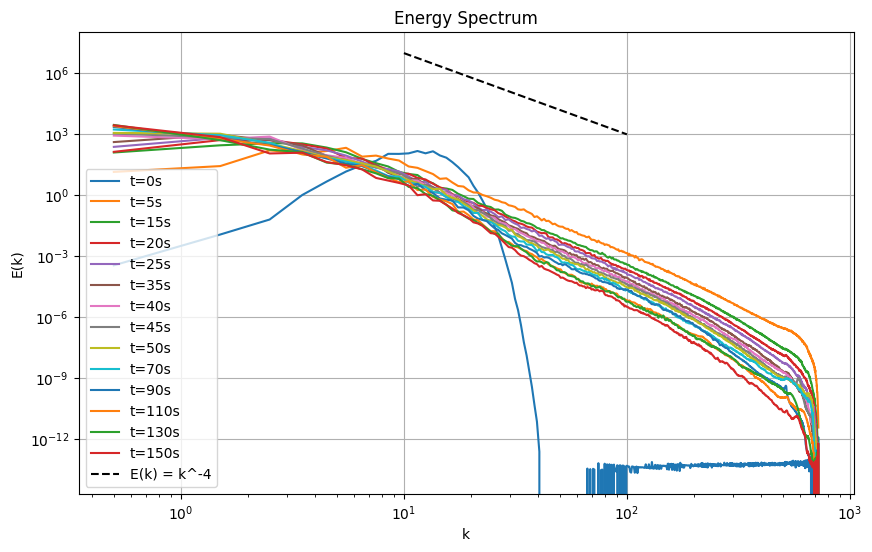

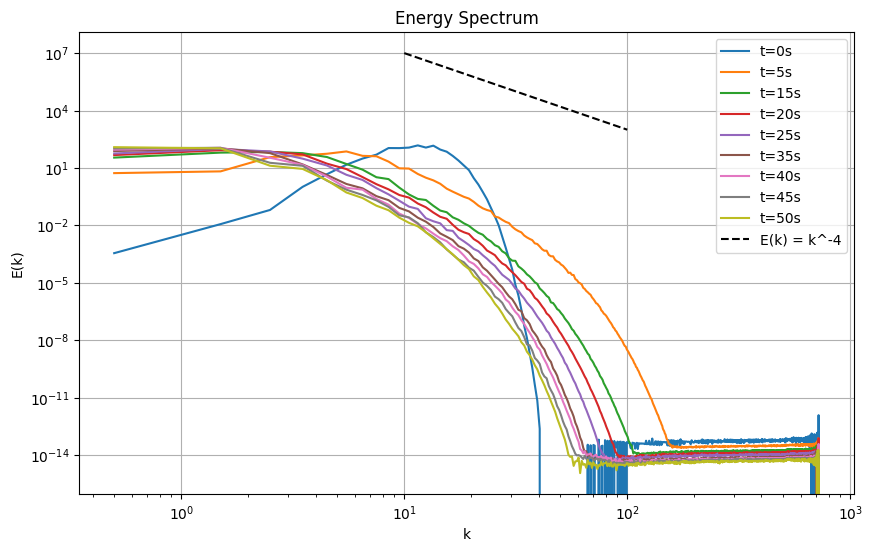

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_energy_spectrum(ux, uy):
    """
    Compute energy spectrum from velocity field (2D case).

    Parameters:
    -----------
    ux, uy : 2D numpy arrays (velocity components)

    Returns:
    --------
    en : 1D array (energy spectrum)
    k : 1D array (wavenumbers)
    """
    dx = 6.283 / 1024  # Grid spacing
    nx, ny = ux.shape

    # FFT of velocity components
    ux_fft = np.fft.fft2(ux)
    uy_fft = np.fft.fft2(uy)

    # Compute kinetic energy spectrum
    E_k = 0.5 * (np.abs(ux_fft)**2 + np.abs(uy_fft)**2) / (nx * ny)

    # Create wave number grid
    kx = 2 * np.pi * np.fft.fftfreq(nx, d=dx)
    ky = 2 * np.pi * np.fft.fftfreq(ny, d=dx)
    kx, ky = np.meshgrid(kx, ky)
    k = np.sqrt(kx**2 + ky**2)

    # Bin energy into wavenumber shells
    k_bins = np.arange(0.5, np.max(k), 1.0)
    en, _ = np.histogram(k.flatten(), bins=k_bins, weights=E_k.flatten())
    en /= np.histogram(k.flatten(), bins=k_bins)[0]  # 평균값 계산

    return en, k_bins[:-1]

# 예제 속도 데이터 로드 및 처리
plt.figure(figsize=(10, 6))

for file in files:
    # 데이터 로드 및 2D 변환
    data = pd.read_csv(file)
    ux = data['ux'].values.reshape(1024, 1024)
    uy = data['uy'].values.reshape(1024, 1024)

    # 에너지 스펙트럼 계산
    energy_spectrum, wavenumbers = compute_energy_spectrum(ux, uy)

    # 파일 이름을 기반으로 라벨 생성
    label = file.split('/')[-1].split('_')[0]
    plt.loglog(wavenumbers, energy_spectrum, label=f"t={label}s")

# 이론적 스펙트럼 추가 (E(k) = k^-4)
k_a = np.logspace(0, 1, 500)
E_k_a = ((k_a)**-4) * 1e7  # y축 평행 이동
k_a_sh = k_a * 10  # x축 평행 이동
plt.loglog(k_a_sh, E_k_a, linestyle='--', color='black', label="E(k) = k^-4")

# 플롯 설정
plt.xlabel("k")
plt.ylabel("E(k)")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for file in files2:
    # 데이터 로드 및 2D 변환
    data = pd.read_csv(file)
    ux = data['ux'].values.reshape(1024, 1024)
    uy = data['uy'].values.reshape(1024, 1024)

    # 에너지 스펙트럼 계산
    energy_spectrum, wavenumbers = compute_energy_spectrum(ux, uy)

    # 파일 이름을 기반으로 라벨 생성
    label = file.split('/')[-1].split('_')[0]
    plt.loglog(wavenumbers, energy_spectrum, label=f"t={label}s")

# 이론적 스펙트럼 추가 (E(k) = k^-4)
k_a = np.logspace(0, 1, 500)
E_k_a = ((k_a)**-4) * 1e7  # y축 평행 이동
k_a_sh = k_a * 10  # x축 평행 이동
plt.loglog(k_a_sh, E_k_a, linestyle='--', color='black', label="E(k) = k^-4")

# 플롯 설정
plt.xlabel("k")
plt.ylabel("E(k)")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()


## Visualizing (only k - E(k)) ##

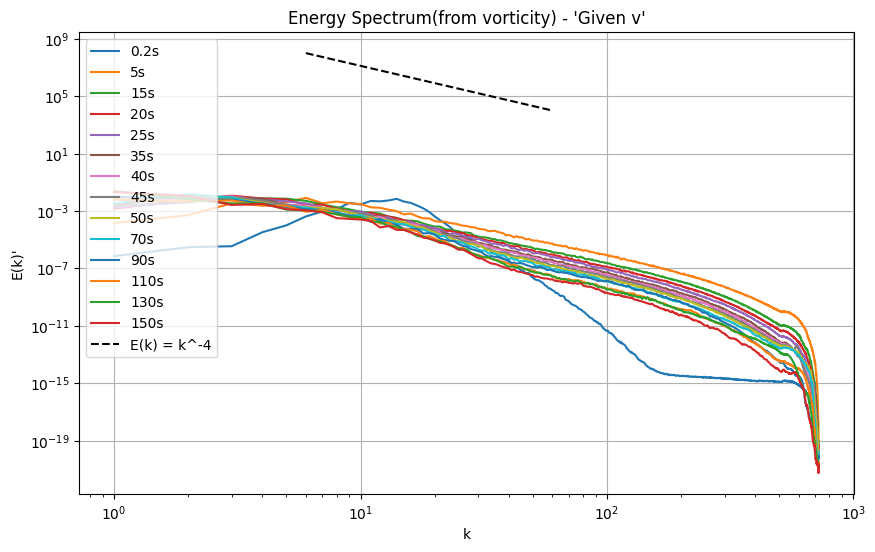

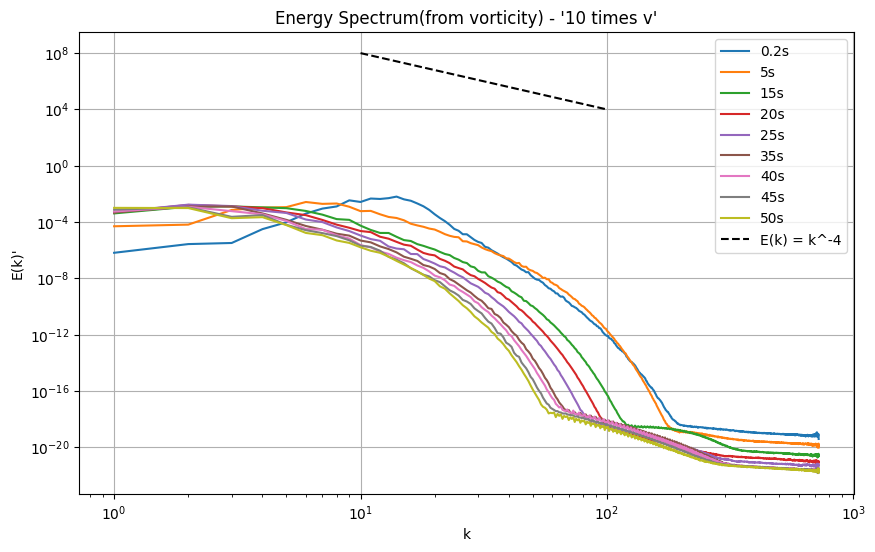

In [13]:
plt.figure(figsize=(10, 6))

for file in files_vor:
    data = pd.read_csv(file, header=0, usecols=[0]).values.flatten()
    data = data[~np.isnan(data)]
    data = data[:1024 * 1024]
    en, n = ensp(1024, 1024, data)
    k=np.linspace(1,n,n)
    
    label = file.split('/')[-1].split('_')[0]
    plt.loglog(k, en[1:], label=f"{label}s")

k_a = np.logspace(0, 1, 500)
E_k_a = ((k_a)**-4) * 10e7
k_a_sh = k_a * 6
plt.loglog(k_a_sh, E_k_a, linestyle='--', color='black', label="E(k) = k^-4")
plt.xlabel("k")
plt.ylabel("E(k)'")
plt.title("Energy Spectrum(from vorticity) - 'Given v'")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
# for file in files2:
#     data = pd.read_csv(file, header=0, usecols=[0]).values.flatten()
#     data = data[~np.isnan(data)]
#     data = data[:1024 * 1024]
#     k, E_k = compute_spectrum(data)
#     label = file.split('/')[-1].split('_')[0]
#     plt.loglog(k[1:], E_k[1:], label=f"{label}s")
    
for file in files2_vor:
    data = pd.read_csv(file, header=0, usecols=[0]).values.flatten()
    data = data[~np.isnan(data)]
    data = data[:1024 * 1024]
    en, n = ensp(1024, 1024, data)
    k=np.linspace(1,n,n)
    
    label = file.split('/')[-1].split('_')[0]
    plt.loglog(k, en[1:], label=f"{label}s")

k_a = np.logspace(0, 1, 500)
E_k_a = ((k_a)**-4) * 10e7 #y축 평행 이동
k_a_sh = k_a * 10 #x축 평행 이동
plt.loglog(k_a_sh, E_k_a, linestyle='--', color='black', label="E(k) = k^-4")
plt.xlabel("k")
plt.ylabel("E(k)'")
plt.title("Energy Spectrum(from vorticity) - '10 times v'")
plt.legend()
plt.grid(True)
plt.show()

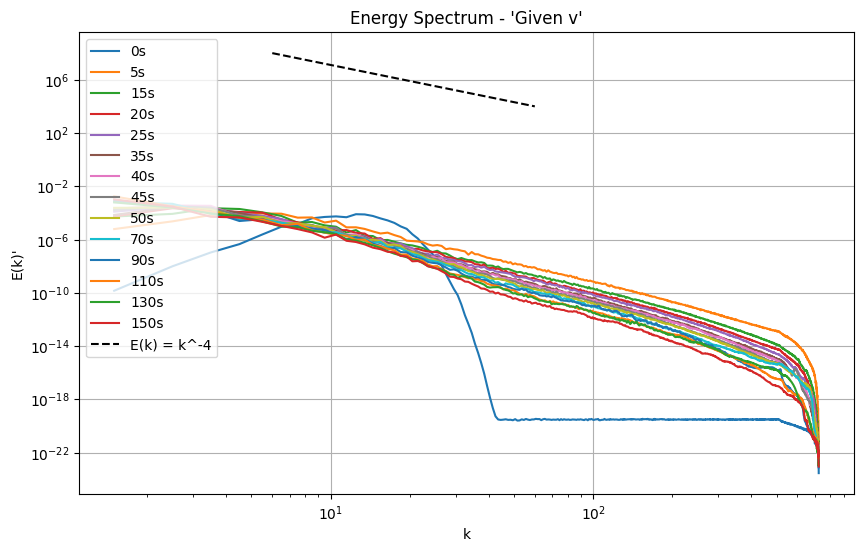

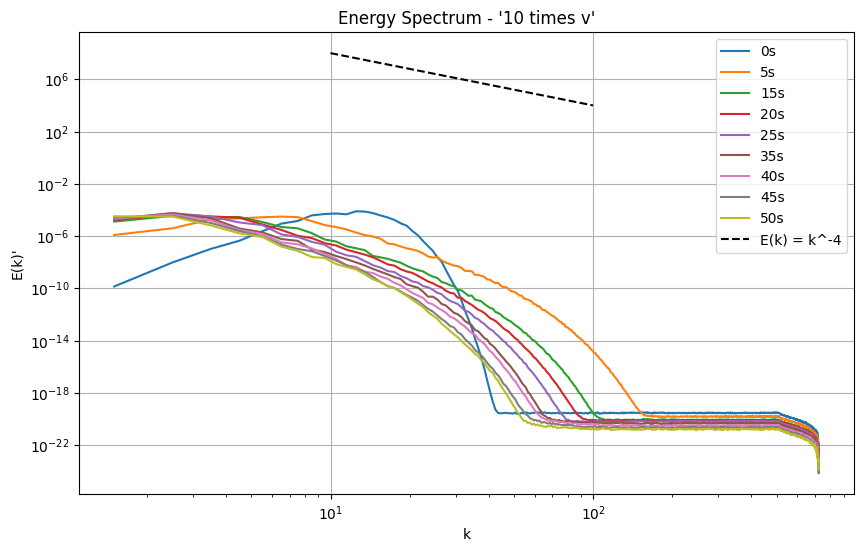

In [18]:
plt.figure(figsize=(10, 6))

for file in files:
    data = pd.read_csv(file, header=0, usecols=[0]).values.flatten()
    data = data[~np.isnan(data)]
    data = data[:1024 * 1024]
    k, E_k = compute_spectrum(data)
    label = file.split('/')[-1].split('_')[0]
    plt.loglog(k[1:], E_k[1:], label=f"{label}s")

k_a = np.logspace(0, 1, 500)
E_k_a = ((k_a)**-4) * 10e7
k_a_sh = k_a * 6
plt.loglog(k_a_sh, E_k_a, linestyle='--', color='black', label="E(k) = k^-4")
plt.xlabel("k")
plt.ylabel("E(k)'")
plt.title("Energy Spectrum - 'Given v'")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for file in files2:
    data = pd.read_csv(file, header=0, usecols=[0]).values.flatten()
    data = data[~np.isnan(data)]
    data = data[:1024 * 1024]
    k, E_k = compute_spectrum(data)
    label = file.split('/')[-1].split('_')[0]
    plt.loglog(k[1:], E_k[1:], label=f"{label}s")


k_a = np.logspace(0, 1, 500)
E_k_a = ((k_a)**-4) * 10e7 #y축 평행 이동
k_a_sh = k_a * 10 #x축 평행 이동
plt.loglog(k_a_sh, E_k_a, linestyle='--', color='black', label="E(k) = k^-4")
plt.xlabel("k")
plt.ylabel("E(k)'")
plt.title("Energy Spectrum - '10 times v'")
plt.legend()
plt.grid(True)
plt.show()

## Cal. Dissp. rate ##

In [5]:
def dissp_rate(data, nu):
    L = 6.283
    grid_size = 1024
    dx = L/grid_size
    nu = nu  # given:0.00001
    
    ux = data.reshape((grid_size, grid_size))
    
    ux_prime = ux - np.mean(ux)
    
    duxdx = (np.roll(ux_prime, -1, axis=1) - np.roll(ux_prime, 1, axis=1)) / (2 * dx)
    duxdy = (np.roll(ux_prime, -1, axis=0) - np.roll(ux_prime, 1, axis=0)) / (2 * dx)
    
    epsilon = 0.5 * nu * np.mean(duxdx**2 + duxdy**2)
    print(f"ε: {epsilon:.6e} m²/s³")
    return epsilon

In [ ]:
eps1 = np.array([])
for file in files:
    data = pd.read_csv(file, header=0).values.flatten()
    data = data[~np.isnan(data)]
    data = data[:1024 * 1024]
    epsilon = dissp_rate(data, 0.00001)
    eps1 = np.append(eps1, epsilon)
plt.plot(range(len(eps1)), eps1, marker='o', linestyle='-')
plt.ylabel("ε")
plt.title("Turbulence Energy Dissipation Rate (v=0.00001 (given))")
plt.grid(True)
plt.show()

In [ ]:
eps2 = np.array([])
for file in files:
    data = pd.read_csv(file, header=0).values.flatten()
    data = data[~np.isnan(data)]
    data = data[:1024 * 1024]
    epsilon = dissp_rate(data, 0.0001)
    eps2 = np.append(eps2, epsilon)
plt.plot(range(len(eps2)), eps2, marker='o', linestyle='-')
plt.ylabel("ε")
plt.title("Turbulence Energy Dissipation Rate (v=0.00001 (given))")
plt.grid(True)
plt.show()
eps2

Text(0.5, 1.0, 'eps: v(given) - v(10 times)')

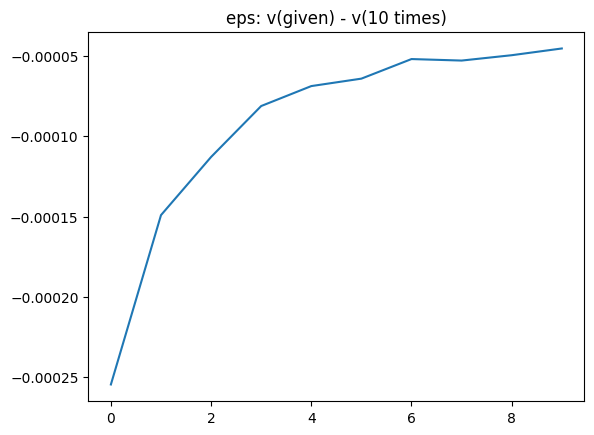

In [8]:
eps = eps1-eps2
plt.plot(range(len(eps2)), eps)
plt.title("eps: v(given) - v(10 times)")

## enstrophy_diss ##

In [15]:
def enstrophy_diss(omega, nu):
    dx = 6.283 / 1024

    if omega.ndim == 1:
        size = int(np.sqrt(omega.size))
        omega = omega.reshape((size, size))
    # ∇ω
    domega_dx = (np.roll(omega, -1, axis=1) - np.roll(omega, 1, axis=1)) / (2 * dx)
    domega_dy = (np.roll(omega, -1, axis=0) - np.roll(omega, 1, axis=0)) / (2 * dx)
    
    # |∇ω|²
    grad_omega_squared = domega_dx**2 + domega_dy**2

    zeta = nu * np.mean(grad_omega_squared)
    
    return zeta
    
def kd_2d(zeta, nu):
    kd = (zeta/(nu)**3)**(1/6)
    return kd

In [ ]:
files_vor = [
    # '../proceed_data/proceed_data_v/processed_data_vor/0.2_vor_data.csv',
    # '../proceed_data/proceed_data_v/processed_data_vor/5_vor_data.csv',
    # '../proceed_data/proceed_data_v/processed_data_vor/10_vor_data.csv',
    # '../proceed_data/proceed_data_v/processed_data_vor/15_vor_data.csv',
    # '../proceed_data/proceed_data_v/processed_data_vor/20_vor_data.csv',
    # '../proceed_data/proceed_data_v/processed_data_vor/25_vor_data.csv',
    # '../proceed_data/proceed_data_v/processed_data_vor/30_vor_data.csv',
    # '../proceed_data/proceed_data_v/processed_data_vor/35_vor_data.csv',
    # '../proceed_data/proceed_data_v/processed_data_vor/40_vor_data.csv',
    # '../proceed_data/proceed_data_v/processed_data_vor/45_vor_data.csv',
    # '../proceed_data/proceed_data_v/processed_data_vor/50_vor_data.csv'

    '../proceed_data/proceed_data_v_10/processed_data_vor/0.2_vor_data.csv',
    '../proceed_data/proceed_data_v_10/processed_data_vor/5_vor_data.csv',
    '../proceed_data/proceed_data_v_10/processed_data_vor/10_vor_data.csv',
    '../proceed_data/proceed_data_v_10/processed_data_vor/15_vor_data.csv',
    '../proceed_data/proceed_data_v_10/processed_data_vor/20_vor_data.csv',
    '../proceed_data/proceed_data_v_10/processed_data_vor/25_vor_data.csv',
    '../proceed_data/proceed_data_v_10/processed_data_vor/30_vor_data.csv',
    '../proceed_data/proceed_data_v_10/processed_data_vor/35_vor_data.csv',
    '../proceed_data/proceed_data_v_10/processed_data_vor/40_vor_data.csv',
    '../proceed_data/proceed_data_v_10/processed_data_vor/45_vor_data.csv',
    '../proceed_data/proceed_data_v_10/processed_data_vor/50_vor_data.csv'
]
DataNum = len(files_vor)

zeta1 = np.array([])

for file in files:
    data = pd.read_csv(file, header=0, dtype=str).squeeze()
    data = pd.to_numeric(data, errors='coerce')
    data = data.dropna().values

    nu = 0.0001
    zeta_value = enstrophy_diss_from_vorticity(data, nu)
    zeta1 = np.append(zeta1, zeta_value)
    
print(zeta1)

In [ ]:
kd1 = kd_2d(zeta1, 0.00001)
kd1

In [ ]:
plt.figure(figsize=(10, 6))
for file in files2:
    data = pd.read_csv(file, header=0).values.flatten()
    data = data[~np.isnan(data)]
    data = data[:1024 * 1024]
    
    k, E_k = compute_spectrum(data)
    label = file.split('/')[-1].split('_')[0]
    plt.loglog(k[1:], E_k[1:], label=f"{label}s")

for x in kd1:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1, label=f"x = {x}")
    
k_a = np.logspace(0, 1, 500)
E_k_a = ((k_a)**-4) * 10e7 #y축 평행 이동
k_a_sh = k_a * 10 #x축 평행 이동

plt.loglog(k_a_sh, E_k_a, linestyle='--', color='black', label="E(k) = k^-4")
plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()

## compute palinstrophy ##

Calculated Palinstrophy: 79.786494


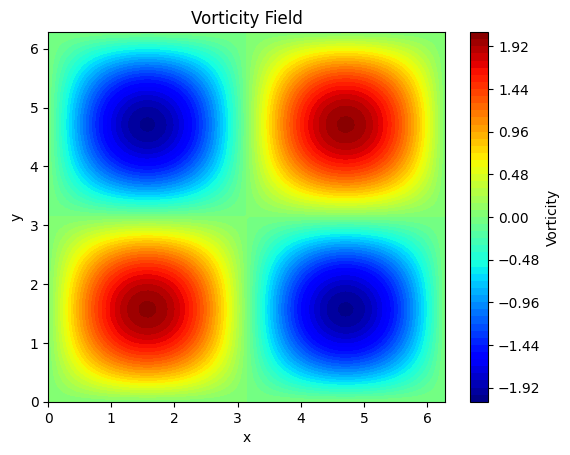

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def compute_vorticity(u, v, dx, dy):
    """
    Calculate the vorticity ω = (dv/dx - du/dy)
    :param u: 2D array of x-direction velocity
    :param v: 2D array of y-direction velocity
    :param dx: Grid spacing in x-direction
    :param dy: Grid spacing in y-direction
    :return: 2D array of vorticity
    """
    dudy, dudx = np.gradient(u, dy, dx)
    dvdy, dvdx = np.gradient(v, dy, dx)
    vorticity = dvdx - dudy
    return vorticity

def compute_palinstrophy(vorticity, dx, dy):
    """
    Calculate the palinstrophy = integral (grad(ω))^2 dA
    :param vorticity: 2D array of vorticity field
    :param dx: Grid spacing in x-direction
    :param dy: Grid spacing in y-direction
    :return: palinstrophy value
    """
    dωdy, dωdx = np.gradient(vorticity, dy, dx)
    grad_omega_squared = dωdx**2 + dωdy**2
    palinstrophy = np.sum(grad_omega_squared) * dx * dy
    return palinstrophy

# Example usage
nx, ny = 100, 100  # Grid size
Lx, Ly = 2 * np.pi, 2 * np.pi  # Domain size
dx, dy = Lx / nx, Ly / ny

# Example velocity field (Taylor-Green vortex)
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

u = np.sin(X) * np.cos(Y)  # Example u-component velocity
v = -np.cos(X) * np.sin(Y)  # Example v-component velocity

# Compute vorticity and palinstrophy
vorticity = compute_vorticity(u, v, dx, dy)
palinstrophy_value = compute_palinstrophy(vorticity, dx, dy)

print(f"Calculated Palinstrophy: {palinstrophy_value:.6f}")

# Visualize vorticity field
plt.contourf(X, Y, vorticity, levels=50, cmap='jet')
plt.colorbar(label="Vorticity")
plt.title("Vorticity Field")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## compute_stress_spectrum ##

In [ ]:
from scipy import integrate

def energy_spectrum(k, k_peak=10, A=1.0, n=-5/3):
    """
    Kolmogorov-type energy spectrum E(k) = A * (k/k_peak)^n * exp(- (k/k_peak)^2)
    :param k: Wavenumber array
    :param k_peak: Peak wavenumber of energy spectrum
    :param A: Scaling factor
    :param n: Power-law exponent (default is -5/3 for Kolmogorov turbulence)
    :return: Energy spectrum E(k)
    """
    return A * (k / k_peak)**n * np.exp(- (k / k_peak)**2)

def compute_stress_spectrum(k_vals, E_k):
    """
    Compute the stress spectrum F(k) using the convolution integral of E(k)
    :param k_vals: Array of wavenumbers
    :param E_k: Corresponding energy spectrum values
    :return: Stress spectrum F(k)
    """
    F_k = np.zeros_like(E_k)

    for i, k in enumerate(k_vals):
        integrand = E_k * np.interp(k - k_vals, k_vals, E_k, left=0, right=0)
        F_k[i] = integrate.simpson(integrand, k_vals)

    return F_k

# Define wavenumber range
k_min, k_max, num_k = 1, 100, 500
k_vals = np.linspace(k_min, k_max, num_k)

# Compute energy spectrum
E_k = energy_spectrum(k_vals, k_peak=10, A=1.0, n=-5/3)

# Compute stress spectrum
F_k = compute_stress_spectrum(k_vals, E_k)

# Plot results
plt.figure(figsize=(10, 6))
plt.loglog(k_vals, E_k, label='Energy Spectrum $E(k)$', linestyle='--')
plt.loglog(k_vals, F_k, label='Stress Spectrum $F(k)$', color='r')
plt.xlabel('Wavenumber $k$')
plt.ylabel('Spectrum')
plt.title('Energy and Stress Spectrum')
plt.legend()
plt.grid(True, which="both", linestyle=":")
plt.show()


## Three dimensional forced case ##

In [9]:
def kom_scale(eps, nu):
    eta = ((nu**3)/eps)**(1/4)
    return eta
def kd_range(eps, nu):
    kd = (eps**(1/4))/(nu**(3/4))
    return kd

In [10]:
eta1 = kom_scale(eps1, 0.00001)
kd1 = kd_range(eps1, 0.00001)
kd1

array([410.06503058, 358.77849524, 334.69838087, 308.24547754,
       295.74006049, 290.63479215, 275.74777394, 276.98190625,
       272.52551787, 266.58153657])

In [11]:
eta2 = kom_scale(eps2, 0.0001)
kd2 = kd_range(eps2, 0.0001)
kd2

array([129.67394854, 113.45572205, 105.84092127,  97.47577875,
        93.52121865,  91.90679105,  87.19910254,  87.58936944,
        86.1801357 ,  84.30048377])

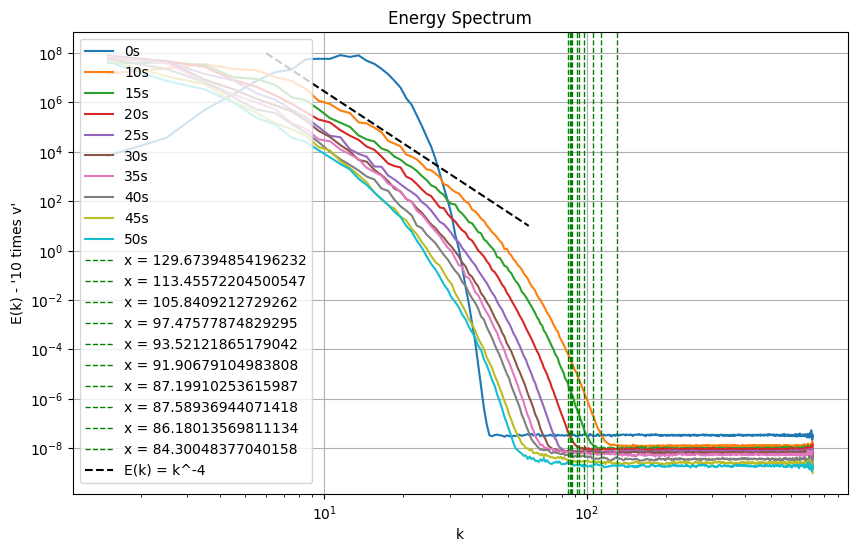

In [49]:
plt.figure(figsize=(10, 6))
for file in files2:
    data = pd.read_csv(file, header=0).values.flatten()
    data = data[~np.isnan(data)]
    data = data[:1024 * 1024]
    
    k, E_k = compute_spectrum(data)
    label = file.split('/')[-1].split('_')[0]
    plt.loglog(k[1:], E_k[1:], label=f"{label}s")

for x in kd2:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1, label=f"x = {x}")
    
k_a = np.logspace(0, 1, 500)
E_k_a = ((k_a)**-7) * 10e7
k_a_sh = k_a * 6

plt.loglog(k_a_sh, E_k_a, linestyle='--', color='black', label="E(k) = k^-4")
plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()

## Two dimension forced decay ##

In [25]:
from scipy.ndimage import sobel

def cal_enstrophy(data, label, visualize=False):
    
    L = 6.283
    grid_size = 1024
    dx = L/grid_size
    dy = dx
    
    vorticity = data.reshape((1024, 1024))
    
    # dux_dx = sobel(ux, axis=1, mode='wrap') / (2.0 * dx) #diff
    # dux_dy = sobel(ux, axis=0, mode='wrap') / (2.0 * dy) #diff

    # duy_dx = dux_dx
    # duy_dy = dux_dy

    # vorticity = duy_dx - dux_dy

    # ∫ |ω|^2 dA
    enstrophy = np.sum(vorticity**2) * (dx * dy)

    if visualize:
        plt.figure(figsize=(6, 5))
        plt.imshow(vorticity, cmap='coolwarm', origin='lower')
        plt.colorbar(label='Vorticity')
        #plt.title(f"Vorticity Field, t={label}")
        plt.title(f"Vorticity Field")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.grid(False)
        plt.show()

    return enstrophy

In [38]:
ens1 = np.array([])
ens2 = np.array([])

for file in files_vor:
    data = pd.read_csv(file, header=0).values.flatten()
    data = data[~np.isnan(data)]
    data = data[:1024 * 1024]
    label = file.split('/')[-1].split('_')[0]
    ens1_1 = cal_enstrophy(data, label, visualize=False)
    ens1 = np.append(ens1, ens1_1)

for file in files2_vor:
    data = pd.read_csv(file, header=0).values.flatten()
    data = data[~np.isnan(data)]
    data = data[:1024 * 1024]
    label = file.split('/')[-1].split('_')[0]
    ens2_2 = cal_enstrophy(data, label, visualize=False)
    ens2 = np.append(ens2, ens2_2)

print(f"Calculated Enstrophy(given): {ens1}")
print(f"Calculated Enstrophy(10 times): {ens2}")

Calculated Enstrophy(given): [622.47369241 449.65100924 189.99161302 149.58269969 126.80970814
  99.20512223  90.21255735  83.60021779  78.48745206  62.58748703
  52.47224792  45.46534869  40.24796497  35.25493011]
Calculated Enstrophy(10 times): [571.08557667  71.32723724  11.99535008   7.13408766   4.8088235
   2.59166663   2.01485953   1.61526208   1.31846151]


In [43]:
eps1 = ens1**(3/2)
nu1 = 0.0001
Ld1 = (nu1**3/eps1)**(1/6)
kd1 = Ld1**(-1)
kl1 = kd1 - Ld1
print(kd1)

eps2 = ens2**(3/2)
nu2 = 0.0001
Ld2 = (nu2**3/eps2)**(1/6)
kd2 = Ld2**(-1)
kl2 = kd2 - Ld2
print(kd2)

[499.4939708  460.4886106  371.26465656 349.71989699 335.57386174
 315.59747808 308.18872675 302.37915719 297.64600491 281.26900613
 269.14258385 259.6690156  251.87553247 243.67162779]
[488.84963803 290.61220566 186.10293906 163.43106485 148.08453616
 126.88047162 119.14098699 112.73551404 107.15609133]


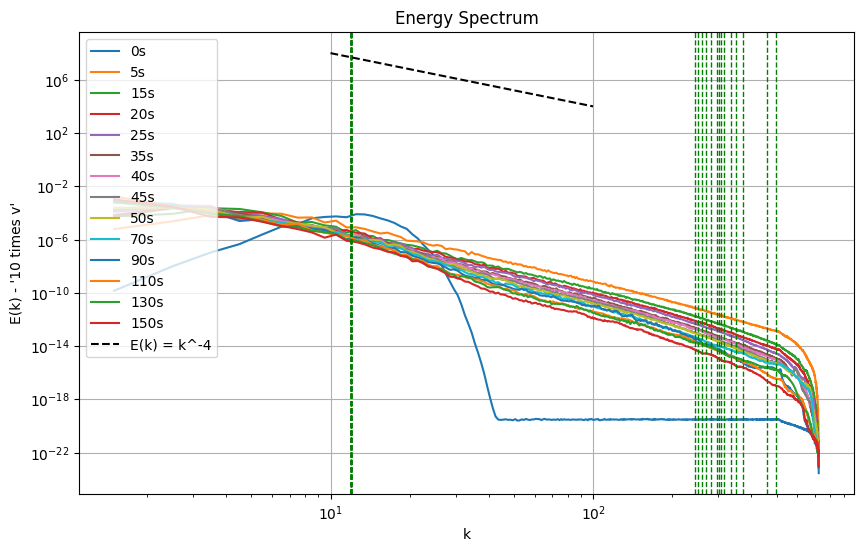

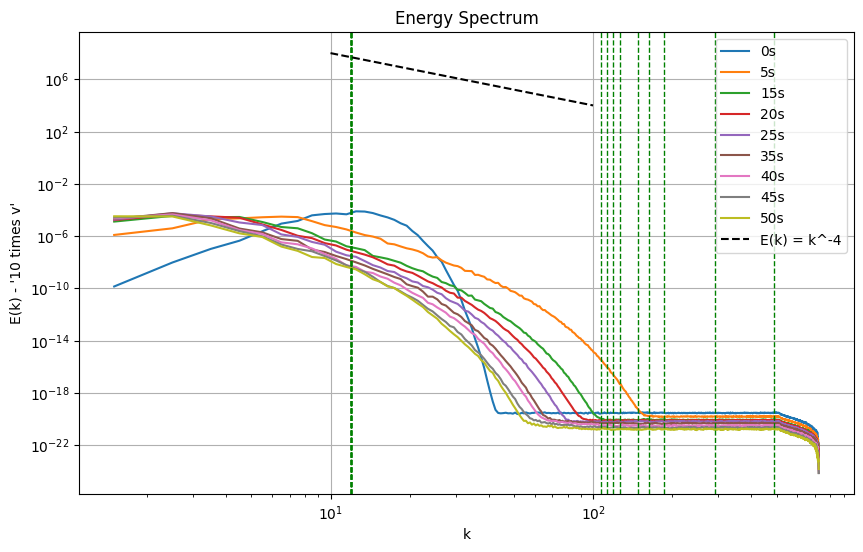

In [46]:
plt.figure(figsize=(10, 6))
for file in files:
    data = pd.read_csv(file, header=0, usecols=[0]).values.flatten()
    data = data[~np.isnan(data)]
    data = data[:1024 * 1024]
    k, E_k = compute_spectrum(data)
    label = file.split('/')[-1].split('_')[0]
    plt.loglog(k[1:], E_k[1:], label=f"{label}s")

for x in kd1:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1)#, label=f"x = {x}")
    plt.axvline(x=12, color='g', linestyle='--', linewidth=1)
    
k_a = np.logspace(0, 1, 500)
E_k_a = ((k_a)**-4) * 10e7 #y축 평행 이동
k_a_sh = k_a * 10 #x축 평행 이동

plt.loglog(k_a_sh, E_k_a, linestyle='--', color='black', label="E(k) = k^-4")
plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for file in files2:
    data = pd.read_csv(file, header=0, usecols=[0]).values.flatten()
    data = data[~np.isnan(data)]
    data = data[:1024 * 1024]
    k, E_k = compute_spectrum(data)
    label = file.split('/')[-1].split('_')[0]
    plt.loglog(k[1:], E_k[1:], label=f"{label}s")

for x in kd2:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1)#, label=f"x = {x}")
    plt.axvline(x=12, color='g', linestyle='--', linewidth=1)
    
k_a = np.logspace(0, 1, 500)
E_k_a = ((k_a)**-4) * 10e7 #y축 평행 이동
k_a_sh = k_a * 10 #x축 평행 이동

plt.loglog(k_a_sh, E_k_a, linestyle='--', color='black', label="E(k) = k^-4")
plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()

## Two dimension freely decay ##

In [19]:
def kdiss(time, nu):
    L_diss = np.sqrt(nu*time)
    k_diss = 1/L_diss
    
    return k_diss

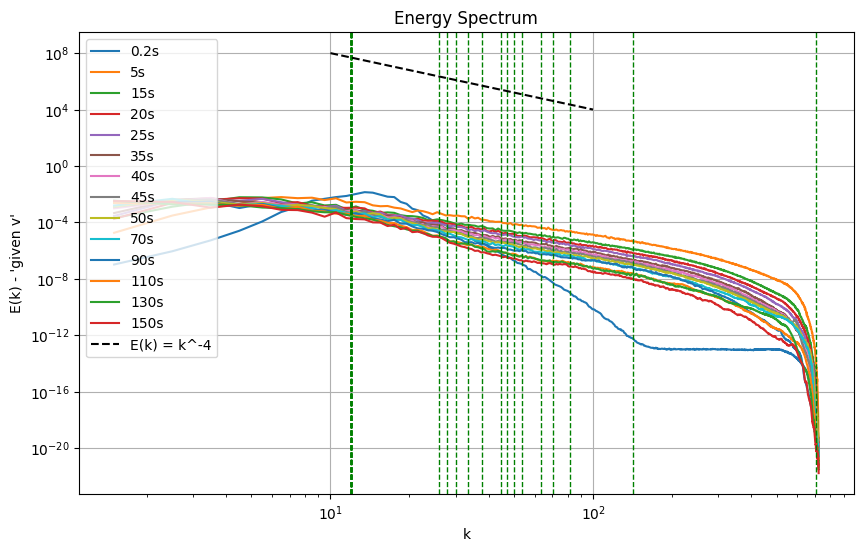

In [21]:
plt.figure(figsize=(10, 6))
kdiss1 = np.array([])
for file in files_vor:
    data = pd.read_csv(file, header=0).values.flatten()
    data = data[~np.isnan(data)]
    data = data[:1024 * 1024]
    label = file.split('/')[-1].split('_')[0]
    kdiss1_1 = kdiss(float(label), 0.00001)
    kdiss1 = np.append(kdiss1, kdiss1_1) 
    k, E_k = compute_spectrum(data)
    plt.loglog(k[1:], E_k[1:], label=f"{label}s")

for x in kdiss1:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1)#, label=f"x = {x}")
    plt.axvline(x=12, color='g', linestyle='--', linewidth=1)
    
k_a = np.logspace(0, 1, 500)
E_k_a = ((k_a)**-4) * 10e7 #y축 평행 이동
k_a_sh = k_a * 10 #x축 평행 이동

plt.loglog(k_a_sh, E_k_a, linestyle='--', color='black', label="E(k) = k^-4")
plt.xlabel("k")
plt.ylabel("E(k) - 'given v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()

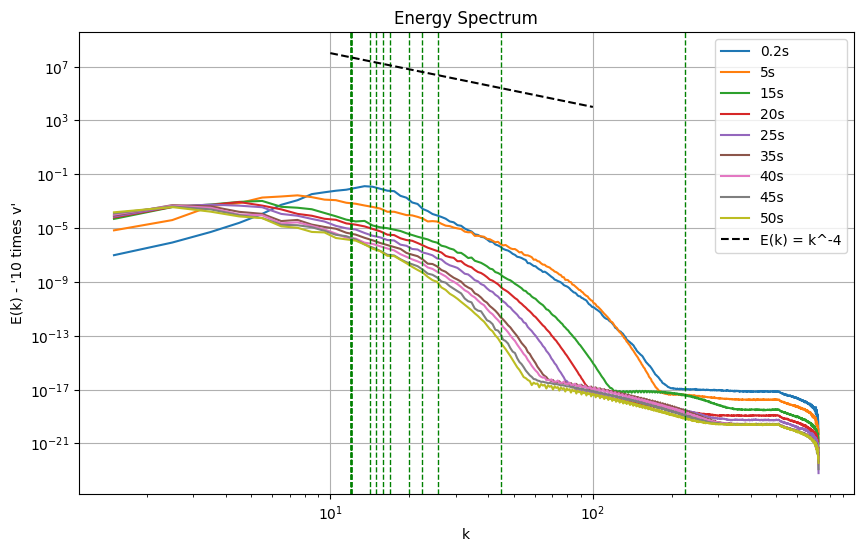

In [24]:
plt.figure(figsize=(10, 6))
kdiss2 = np.array([])
for file in files2_vor:
    data = pd.read_csv(file, header=0).values.flatten()
    data = data[~np.isnan(data)]
    data = data[:1024 * 1024]
    label = file.split('/')[-1].split('_')[0]
    kdiss2_2 = kdiss(float(label), 0.0001)
    kdiss2 = np.append(kdiss2, kdiss2_2) 
    k, E_k = compute_spectrum(data)
    plt.loglog(k[1:], E_k[1:], label=f"{label}s")

for x in kdiss2:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1)#, label=f"x = {x}")
    plt.axvline(x=12, color='g', linestyle='--', linewidth=1)
    
k_a = np.logspace(0, 1, 500)
E_k_a = ((k_a)**-4) * 10e7 #y축 평행 이동
k_a_sh = k_a * 10 #x축 평행 이동

plt.loglog(k_a_sh, E_k_a, linestyle='--', color='black', label="E(k) = k^-4")
plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()